In [ ]:
!pip install xgboost

In [2]:
import re
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import ensemble
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [54]:
df = pd.read_csv("/content/drive/MyDrive/thesis/suicide_data_cleaned1.csv")

In [15]:
df.head(10)

,Unnamed: 0,post_id,text,labels,suicide_class
0,0,wfimt,motiv first post reddit time ago want chang li...,0,Suicide
1,1,1bsqv3,simpl question transfer acc anoth server hi ha...,1,Non_Suicide
2,2,1dr0xf,simpl question get unnban hi simpl question ge...,1,Non_Suicide
3,3,1e0noi,win noy fault hi play eu west diamond right dr...,1,Non_Suicide
4,4,1f0y6g,diamond mrr rest switch server eu go back west...,1,Non_Suicide
5,5,1g4s52,scare next ban hi guy alreadi get one perm ban...,1,Non_Suicide
6,6,1it5ts,player huge impact lose game want report every...,1,Non_Suicide
7,7,1sge5s,short question short stori pls help decid hi l...,1,Non_Suicide
8,8,1sjbf9,mayb right time fa mayb right moment face fuck...,0,Suicide
9,9,226mcd,conclus think suicid room well want share some...,0,Suicide


<Axes: ylabel='labels'>

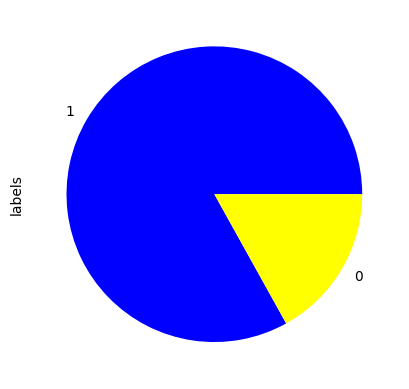

In [16]:
count_classes = pd.value_counts(df['labels'])
count_classes.plot.pie(colors = ['blue', 'yellow'])

In [17]:
df.shape

(698997, 5)

In [18]:
df.labels.value_counts()

1    580688
0    118309
Name: labels, dtype: int64

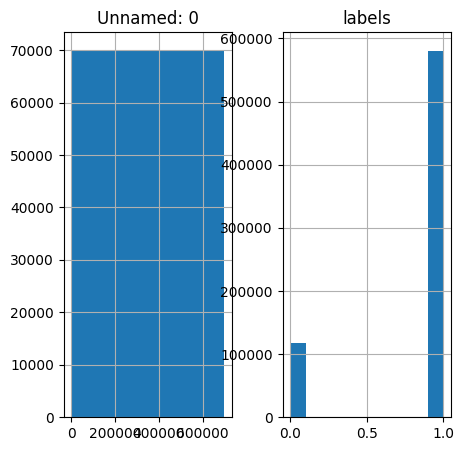

In [19]:
df.hist(figsize=(5, 5));

<ipython-input-20-a8c493d13e19>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True, cmap="Greens_r")


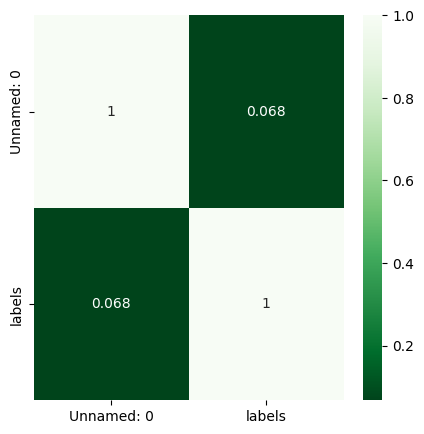

In [20]:
plt.figure(figsize=(5,5))
sns.heatmap(data=df.corr(), annot=True, cmap="Greens_r")
plt.show();

In [56]:
df = df.sample(frac = 1)

In [57]:
#replacing missing value with null string
df = df.fillna('')

In [55]:
#df = df.sample(n=50000, replace=False)
#df.reset_index(inplace=True)

In [58]:
vectorization = TfidfVectorizer()
x = vectorization.fit_transform(df["text"])
y = df["labels"]

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [60]:
xv_train = x_train
xv_test = x_test

In [26]:
df.columns

Index(['Unnamed: 0', 'post_id', 'text', 'labels', 'suicide_class'], dtype='object')

In [27]:
names = ["NB", "SVM", "LR", "DT", "GBC", "RF","KNN"]

In [28]:
scores = []
preci = []
recall = []
f1 = []

Naive Bayes

In [29]:
from sklearn import naive_bayes

In [30]:
clf = naive_bayes.MultinomialNB()
clf.fit(xv_train, y_train)

MultinomialNB()

In [31]:
pred_nb=clf.predict(xv_test)

In [32]:
clf.score(xv_test, y_test)

0.8907868383404864

In [33]:
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.89      0.41      0.56     23676
           1       0.89      0.99      0.94    116124

    accuracy                           0.89    139800
   macro avg       0.89      0.70      0.75    139800
weighted avg       0.89      0.89      0.87    139800



In [34]:
scores.append(accuracy_score(y_test, pred_nb))

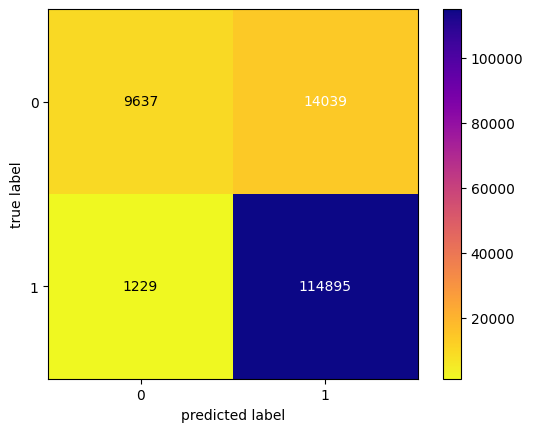

In [35]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

lr_cmat = confusion_matrix(y_test, pred_nb)
plot_confusion_matrix(conf_mat=lr_cmat, cmap='plasma_r', colorbar=True)
plt.show()

In [36]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
preci.append(precision_score(y_test, pred_nb, average='macro'))
recall.append(recall_score(y_test, pred_nb, average='macro'))
f1.append(f1_score(y_test, pred_nb, average='macro'))

Support Vector Machine(SVM)

In [37]:
from sklearn.svm import LinearSVC

In [38]:
sv = svm.LinearSVC()
sv.fit(x_train, y_train)

LinearSVC()

In [39]:
sv_pred = sv.predict(x_test)
sv.score(xv_test, y_test)

0.9759728183118741

In [40]:
print(classification_report(y_test, sv_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     23676
           1       0.98      0.99      0.99    116124

    accuracy                           0.98    139800
   macro avg       0.96      0.96      0.96    139800
weighted avg       0.98      0.98      0.98    139800



In [41]:
scores.append(accuracy_score(y_test, sv_pred))

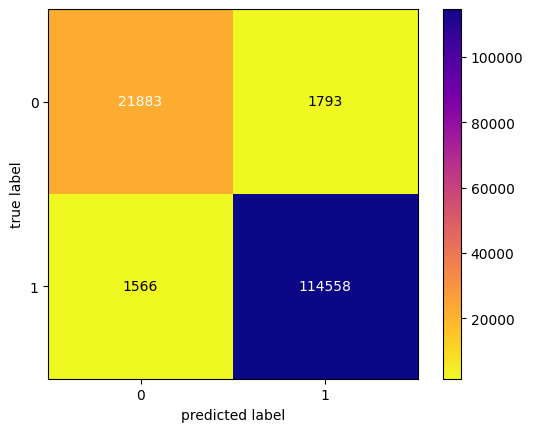

In [42]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

lr_cmat = confusion_matrix(y_test, sv_pred)
plot_confusion_matrix(conf_mat=lr_cmat, cmap='plasma_r', colorbar=True)
plt.show()

In [43]:
preci.append(precision_score(y_test, sv_pred, average='macro'))
recall.append(recall_score(y_test, sv_pred, average='macro'))
f1.append(f1_score(y_test, sv_pred, average='macro'))

Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression  

In [45]:
LR = LogisticRegression(max_iter=10000)
LR.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [46]:
pred_lr=LR.predict(xv_test)

In [47]:
LR.score(x_test, y_test)

0.9775250357653791

In [48]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     23676
           1       0.98      0.99      0.99    116124

    accuracy                           0.98    139800
   macro avg       0.96      0.95      0.96    139800
weighted avg       0.98      0.98      0.98    139800



In [49]:
scores.append(accuracy_score(y_test, pred_lr))

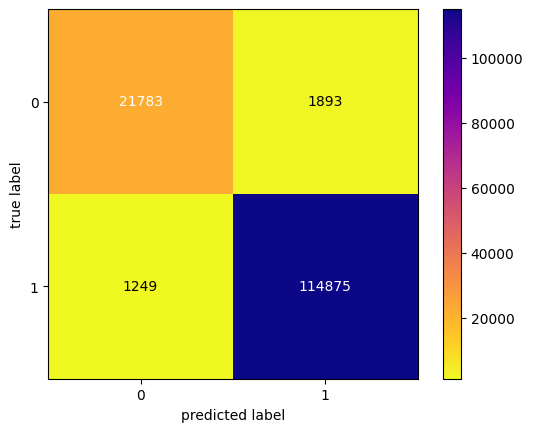

In [50]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

lr_cmat = confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(conf_mat=lr_cmat, cmap='plasma_r', colorbar=True)
plt.show()

In [51]:
preci.append(precision_score(y_test, pred_lr, average='macro'))
recall.append(recall_score(y_test, pred_lr, average='macro'))
f1.append(f1_score(y_test, pred_lr, average='macro'))

Decision Tree Classification

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [62]:
pred_dt = DT.predict(xv_test)

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
#cm = confusion_matrix(y_test, pred_dt)
#print(cm)

In [64]:
DT.score(xv_test, y_test)

0.899

In [65]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70      1670
           1       0.94      0.94      0.94      8330

    accuracy                           0.90     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.90      0.90      0.90     10000



In [66]:
scores.append(accuracy_score(y_test, pred_dt))

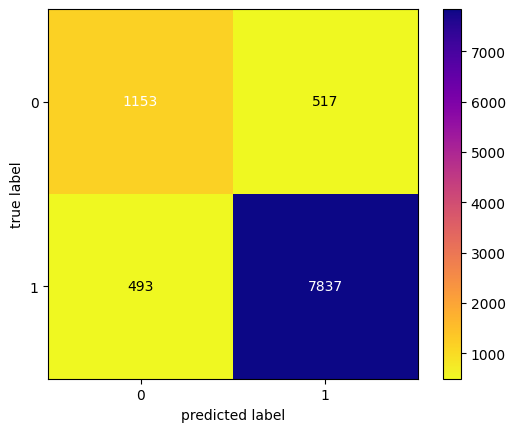

In [67]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

lr_cmat = confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(conf_mat=lr_cmat, cmap='plasma_r', colorbar=True)
plt.show()

In [68]:
preci.append(precision_score(y_test, pred_dt, average='macro'))
recall.append(recall_score(y_test, pred_dt, average='macro'))
f1.append(f1_score(y_test, pred_dt, average='macro'))

Gradient Boosting Classifier

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [71]:
pred_gbc = GBC.predict(xv_test)

In [72]:
GBC.score(xv_test, y_test)

0.9447

In [73]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81      1670
           1       0.95      0.99      0.97      8330

    accuracy                           0.94     10000
   macro avg       0.94      0.85      0.89     10000
weighted avg       0.94      0.94      0.94     10000



In [74]:
scores.append(accuracy_score(y_test, pred_gbc))

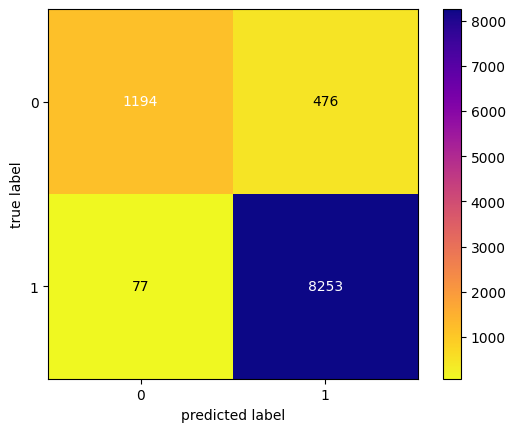

In [75]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

lr_cmat = confusion_matrix(y_test, pred_gbc)
plot_confusion_matrix(conf_mat=lr_cmat, cmap='plasma_r', colorbar=True)
plt.show()

In [76]:
preci.append(precision_score(y_test, pred_gbc, average='macro'))
recall.append(recall_score(y_test, pred_gbc, average='macro'))
f1.append(f1_score(y_test, pred_gbc, average='macro'))

Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [79]:
pred_rfc = RFC.predict(xv_test)

In [80]:
RFC.score(xv_test, y_test)

0.9032

In [81]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.42      0.59      1670
           1       0.90      1.00      0.95      8330

    accuracy                           0.90     10000
   macro avg       0.94      0.71      0.77     10000
weighted avg       0.91      0.90      0.89     10000



In [82]:
scores.append(accuracy_score(y_test, pred_rfc))

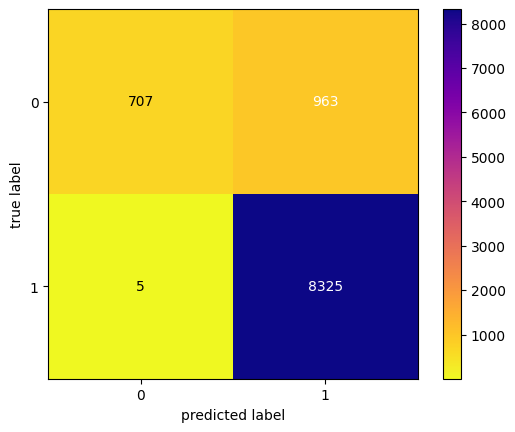

In [83]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

lr_cmat = confusion_matrix(y_test, pred_rfc)
plot_confusion_matrix(conf_mat=lr_cmat, cmap='plasma_r', colorbar=True)
plt.show()

In [84]:
preci.append(precision_score(y_test, pred_rfc, average='macro'))
recall.append(recall_score(y_test, pred_rfc, average='macro'))
f1.append(f1_score(y_test, pred_rfc, average='macro'))

KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(xv_train, y_train)

KNeighborsClassifier()

In [87]:
pred_knn = KNN.predict(xv_test)

In [88]:
KNN.score(xv_test, y_test)

0.8334

In [89]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.00      0.01      1670
           1       0.83      1.00      0.91      8330

    accuracy                           0.83     10000
   macro avg       0.83      0.50      0.46     10000
weighted avg       0.83      0.83      0.76     10000



In [90]:
scores.append(accuracy_score(y_test, pred_knn))

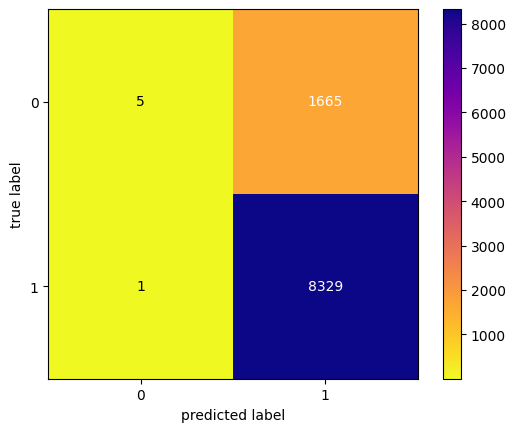

In [91]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

lr_cmat = confusion_matrix(y_test, pred_knn)
plot_confusion_matrix(conf_mat=lr_cmat, cmap='plasma_r', colorbar=True)
plt.show()

In [92]:
preci.append(precision_score(y_test, pred_knn, average='macro'))
recall.append(recall_score(y_test, pred_knn, average='macro'))
f1.append(f1_score(y_test, pred_knn, average='macro'))

In [93]:
scores = [round(x*100, 2)  for x in scores]
preci = [round(x*100, 2)  for x in preci]
recall = [round(x*100, 2)  for x in recall]
f1 = [round(x*100, 2)  for x in f1]

df = pd.DataFrame()
df['Classifier Name'] = names
df['Accuracy Score'] = scores

cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,Classifier Name,Accuracy Score
0,NB,89.080000
1,SVM,97.600000
2,LR,97.750000
3,DT,89.900000
4,GBC,94.470000
5,RF,90.320000
6,KNN,83.340000


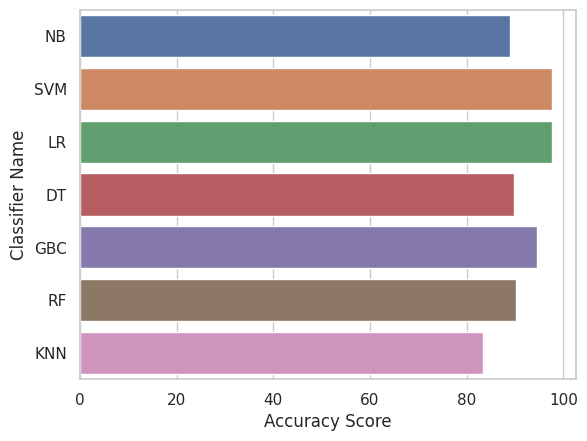

In [94]:
sns.set(style="whitegrid")
ax = sns.barplot(y="Classifier Name", x="Accuracy Score", data = df)

Precision Recall F1 Score

In [95]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

In [96]:
x = np.arange(len(names))
width = 0.35

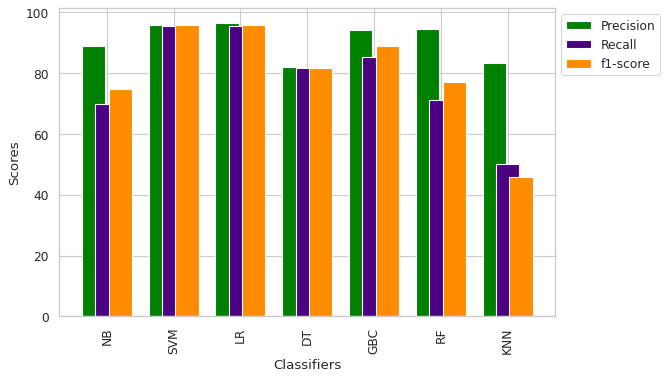

In [97]:
plt.figure(figsize=(8,5), dpi=80)
plt.bar(x-0.2, preci, width, color='green')
plt.bar(x, recall, width, color='indigo')
plt.bar(x+0.2, f1, width, color='darkOrange')
plt.xticks(x, names, rotation=90)
plt.xlabel("Classifiers")
plt.ylabel("Scores")
plt.legend(["Precision", "Recall", "f1-score"], bbox_to_anchor=(1,1), loc="upper left")
plt.show()

In [98]:
import pandas as pd
from zipfile import ZipFile as zip
res_df = pd.DataFrame(np.column_stack([names, scores, preci, recall, f1]), columns =['Classifier', 'Accuracy Score', 'Precision', 'Recall', 'F1-score'])

In [99]:
res_df

,Classifier,Accuracy Score,Precision,Recall,F1-score
0,NB,89.08,88.9,69.82,74.78
1,SVM,97.6,95.89,95.54,95.71
2,LR,97.75,96.48,95.46,95.96
3,DT,89.9,81.93,81.56,81.74
4,GBC,94.47,94.24,85.29,88.98
5,RF,90.32,94.46,71.14,76.93
6,KNN,83.34,83.34,50.14,45.75
